In [3]:
%matplotlib nbagg
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['indices']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [11]:
from fondos import producer, series
import pandas as pd
from statsmodels.tsa.filters.hp_filter import hpfilter
from collections import namedtuple

start_date = '2016-01-01'

Data = namedtuple('Data', 'data orig_data id2obj'.split())

def get_data(start_date='2017-01-01'):
    data = []
    orig_data = []
    id2obj = {}

    for t in producer.tickers:
        q = series.Quote(t)
        returns = q.get_returns(start_date=start_date)
        returns = returns / returns.max()

        orig_data.append(returns)

        returns = hpfilter(returns, lamb=160)[1]

        id2obj[len(data)] = t
        data.append(returns)

    data = pd.DataFrame(data).T
    orig_data = pd.DataFrame(orig_data).T
    return Data(data=data, orig_data=orig_data, id2obj=id2obj)


In [12]:
from itertools import chain
import cluster_dataset

def cluster(data, id2obj):
    cdt = cluster_dataset.ClusterDataset(data, id2obj)
    indices = cdt.cluster_inconsistency(0.99, depth=3)
    return cdt.get_human_readable_cluster(indices)

def plot_cluster(clusters):
    fig, axs = subplots(3, int(ceil(len(clusters)/3.0)), sharex=True, figsize=(15,10))
    axs = list(chain(*axs))
    
    for i, cluster in enumerate(cdt.get_human_readable_cluster(indices)):
        for ticker in cluster:
            cdt.data.T.loc[ticker].plot(ax=axs[i])
            orig_data.T.loc[ticker].plot(c='k', alpha=0.125, label=None, ax=axs[i])
            
        axs[i].legend(
            [e for i, e in enumerate(axs[i].get_lines()) if i % 2 == 0],
            cluster,
            loc='best',
            ncol=2,
            fontsize=9
        )


<IPython.core.display.Javascript object>


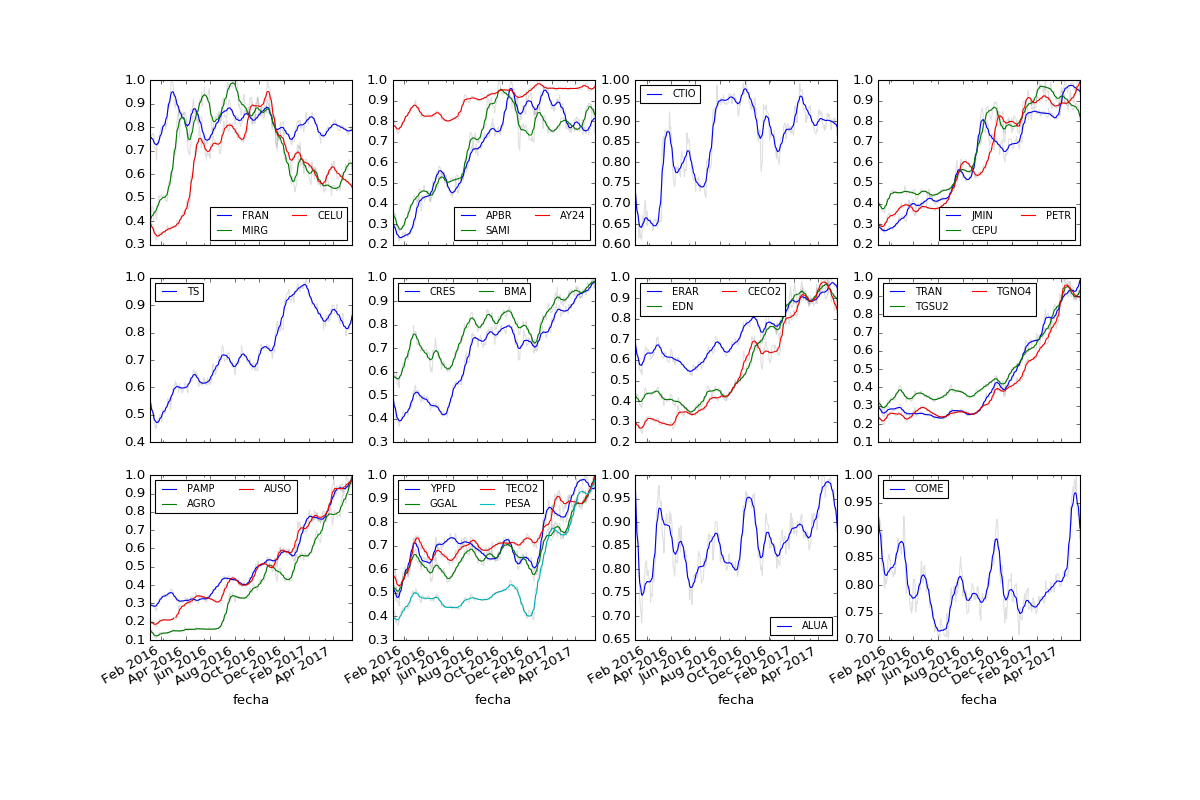

In [13]:
data_2017 = get_data('2017-01-01')
plot_cluster(cluster(data_2017.data, data_2017.id2obj))

In [14]:
data_2016 = get_data('2016-01-01')
plot_cluster(cluster(data_2016.data, data_2016.id2obj))

NoFile: no file in gridfs collection Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), u'fondos'), u'stocks_cache.fs.files') with _id ObjectId('59208b9ef8e60e4ad447e6ba')